# Fields and fundamental interactions in physics

In this notebook companion we will program field vector distributions.

This notebooks aim at developing a **practical** sense of the electrostatic/magnetostatic field mapping. Do not give up because the code looks too complex. You are guided by questions that focus mostly on the physics of the lecture on *"Fundamental Interactions"*. These lessons are illustrated by some python code we are going to put hands on.

Remember:

- Make your personal copy of this document by renaming it.
- Give a proper answer in the markdown cell that immediately follows the questions. Check that the answer number is correct. The mark "**Answer n:**" should never be removed. This is crucial to fetch the corrections. 
- It proves to be necessary to modify the code cells: You need extra testing so do not hesitate to copy pieces of code that you understand.
- The cells contain variables and these will not be initialized unless executed one after the other. Do not try to execute the last cell first.
- The code is written with the same structure always, putting the declaration of the constants first on the cell, and the visual display at the end.
- This code has been tested successfully with python 3.6 in early 2021.

# 1) The Electric monopole

Electric charge distribution

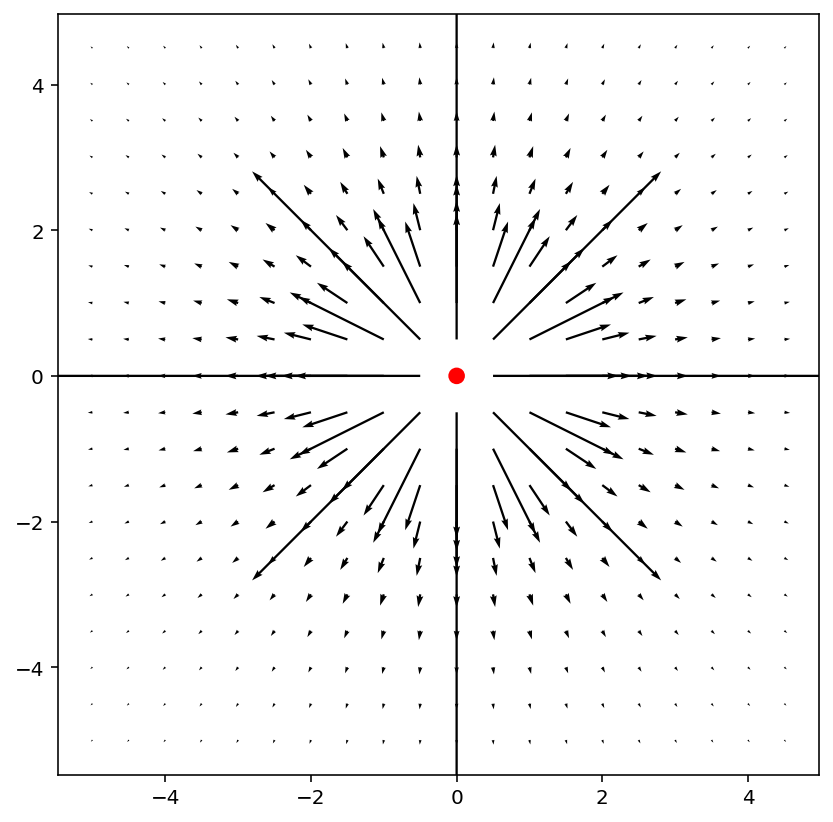

In [1]:
import numpy as np # numerical library
import matplotlib.pyplot as plt # Visualization with Python
from matplotlib.patches import Circle # To model a point charge

# Next line is to remove an error warning at point (0,0)
np.seterr(divide='ignore', invalid='ignore')


# We start giving data 
# Field of view:
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
U, V = np.meshgrid(X, Y)

# Calulation of the distance between a point M and the place where the charge is
r=(U**2+V**2)**0.5

# Display for vizualisation
fig, ax = plt.subplots()
q = ax.quiver(X, Y, U/r**3, V/r**3)

# Add filled circles for the charges themselves
ax.add_artist(plt.Circle((0, 0), 0.1, color='r'))
ax.set_aspect('equal')
plt.show()

# 2) Magnetic field

## 2.1) The magnetic coil

We first adress a problem of numerical analysis. How much steps do we want ?

In [2]:
# Definitions

my0=4*np.pi*1e-7   # Approximative Vacuum permeability 
                    # before 2018 
                    #(https://en.wikipedia.org/wiki/Vacuum_permeability)
                    # it is expressed inH/m 
        
my0= 1.25663706210E-6
                    #The value in SI units, by CODATA 2018, 
                    #It is simply proportional to the dimensionless fine-structure constant, with no other dependencies.

I0= 1              # Curent intensity
                    
    
# Dimensions
d=20*1e-3 # Coil's diameter (m)
r=d/2 # Coil's radius (m)

npoint=21 # number of coil nodes for discretization
alpha = 2*np.pi/(npoint-1) # angle discretization

# initialization
x=[i*0 for i in range(npoint)]
y=[r*np.sin(i*alpha) for i in range(npoint)]
z=[-r*np.cos(i*alpha) for i in range(npoint)]


# Definition of positive direction of current using right hand method
# All lenghts are expressed in m

x_spire=np.array([x]);
y_spire=np.array([y]);
z_spire=np.array([z]);

#### Question 1:

Write a formula that could display the number of segments.

Your code need to include the already defined variable name define above ?


**Answer 1:**

Write your answer instead 

In [3]:
npoint-1

20

#### Question 2:


At this point the discretization will consider no curves nor circles but only polygons with a finite (opposed to infinite) number of segments. The less the number of segments the worse the definition of the coils will be. 

Give a reason below not to over-increase the number of discrete elements.

**Answer 2:**

Write your answer instead 

Complexity 

## 2.2) The field mapping of B

### 2.2.1) Calculation of field in the middle

Now we are going to numericaly calculate the distribution of a certain number of magnetic vectors. This part follows the first one.

In [4]:
#%%%%%%%%%% Magnetic field calculations in a ex, ey plabe
# The coils main axis is oriented towards ey


ndp=30 # Number of space points

# x range
xmin,xmax=-0.05,0.05

# y range
ymin, ymax=-0.05, 0.05

# limites z
zmin, zmax=-0.05,0.05

dx=(xmax-xmin)/(ndp-1) #increment x
dy=(ymax-ymin)/(ndp-1) # increment y
dz=(zmax-zmin)/(ndp-1) # increment z

#%%%%%%%%%%%%%%%        Magnetostatic    %%%%%%%%%%%%%%%%%%%%%%%%%%%#

 

bxf=np.zeros(ndp)  # 
byf=np.zeros(ndp)  # 
bzf=np.zeros(ndp)  # 




bfx,bfy,bfz=0,0,0



#### Question 3

Declare here a new variable `nseg` corresponding to the number of points.

**Answer 4:**

Write your answer in the code below before you execute the next cells.

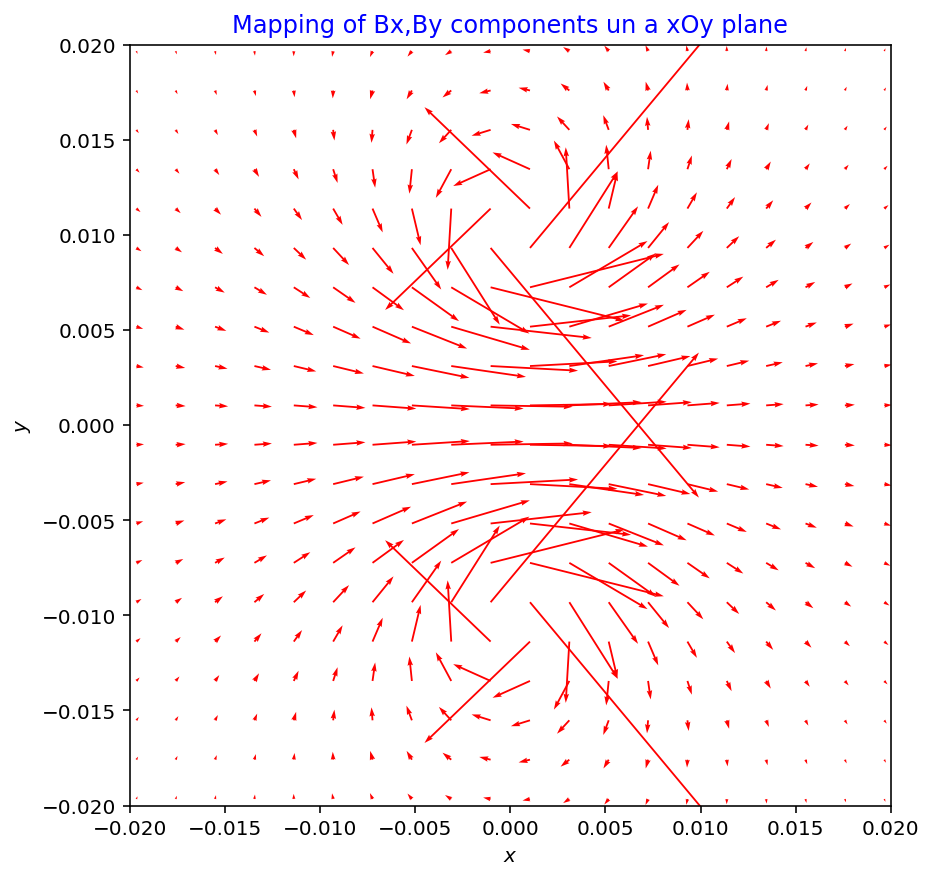

In [6]:
#magnetic field vectors at differents points of a plane xOy

s = (ndp,ndp)

xM1f=np.zeros(s)
yM1f=np.zeros(s)

X = np.zeros(s)
Y = np.zeros(s)

bx1f=np.zeros(s)
by1f=np.zeros(s)
bz1f=np.zeros(s)


I0f1=my0*I0/(4*np.pi) # replace a series of factors by 1E-7 

#point coordinates
xM1f = np.linspace(-.03,.03,ndp)
yM1f = np.linspace(-.03,.03,ndp)

(X,Y) = np.meshgrid(xM1f,yM1f)

xM, yM, zM= 0, 0, 0

for i in range(ndp):
          
    #Initialization
    bfx,bfy,bfz=0,0,0
    
    
    for j in range(ndp):
        
        xM=X[i][j]
        yM=Y[i][j]
        
         
        bfx,bfy,bfz=0,0,0
    
        R=np.array([xM,yM,zM])
        for wseg in range(nseg):
            xs=x_spire[0][wseg]
            ys=y_spire[0][wseg]
            zs=z_spire[0][wseg]
        
            Rs=np.array([xs, ys, zs])
        
            drsx=(x_spire[0][wseg+1]-x_spire[0][wseg])
            drsy=(y_spire[0][wseg+1]-y_spire[0][wseg])
            drsz=(z_spire[0][wseg+1]-z_spire[0][wseg])
    
            drs=np.array([drsx, drsy, drsz])
        
            Delta_R= Rs - R
 
            Delta_Rdist=np.sqrt(Delta_R[0]**2+Delta_R[1]**2+Delta_R[2]**2)
        
            Delta_Rdis3=Delta_Rdist**3
        
            b12=1/Delta_Rdis3 # 1/(x^2+r^2)^(3/2)
            
            # a factor 1E7 is missing
        
            #
            Delta_Rxdrs_x=Delta_R[1]*drsz-Delta_R[2]*drsy
            Delta_Rxdrs_y=Delta_R[2]*drsx-Delta_R[0]*drsz
            Delta_Rxdrs_z=Delta_R[0]*drsy-Delta_R[1]*drsx
        
            #
            bfx=bfx+b12*Delta_Rxdrs_x
            bfy=bfy+b12*Delta_Rxdrs_y
            bfz=bfz+b12*Delta_Rxdrs_z
            
        bx1f[i][j]+=bfx
        by1f[i][j]+=bfy
        bz1f[i][j]+=bfz
        
# Ploting

fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(X,Y,bx1f,by1f,color='r')

plt.title ('Mapping of Bx,By components un a xOy plane',color='b')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-0.02,0.02)
ax.set_ylim(-0.02,0.02)
ax.set_aspect('equal')

plt.show()

#### Question 4:

Could you predict the limit where the analytical results match the numerical ones within the limit of 95% (only 5% discrepancy between the analytical calculated field at a central position and the numerical calculated value, refered to this last). This requires finding an analytical formula for the field produced at the green point (corresponding to the center) by single turn coils.

### 2.2.2) Study of the streamline

For better visualiation we can replace the function `quiver` by the function `streamplot`, it will provide *force lines*, whose tangent are part of the *vector field* visualized with a quiver of red arrows in the figure above.


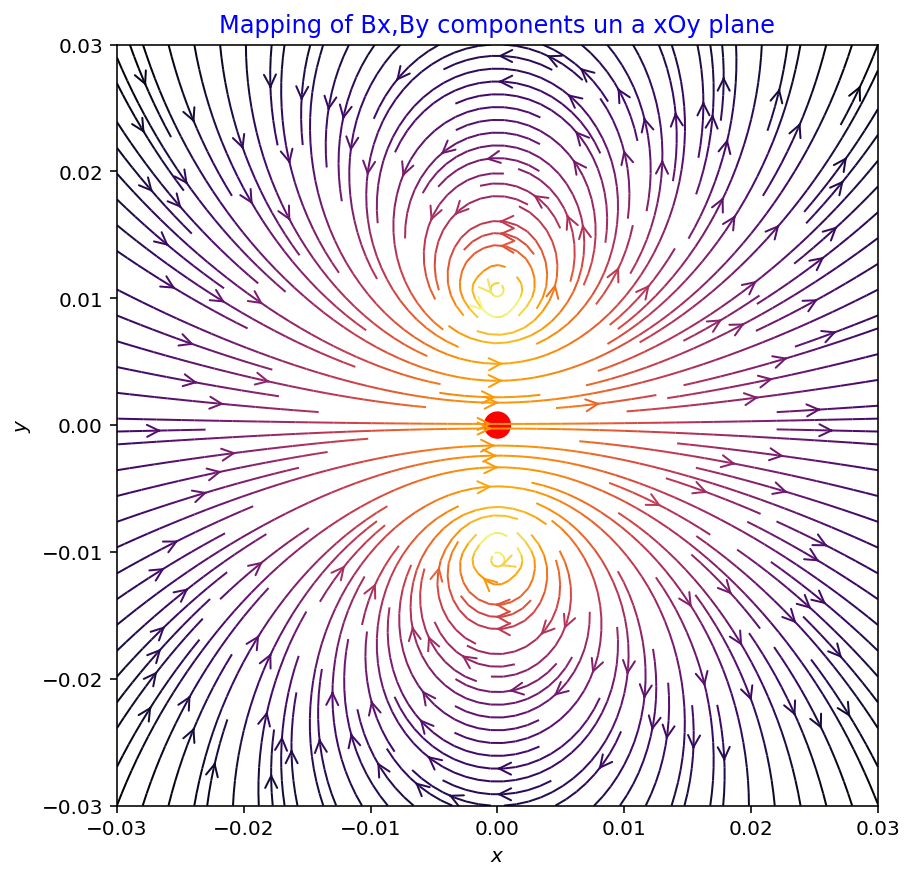

In [7]:
color = 2 * np.log(np.hypot(bx1f, by1f))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.streamplot(X,Y,bx1f,by1f,color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
plt.title ('Mapping of Bx,By components un a xOy plane',color='b')


ax.add_artist(plt.Circle((0, 0), 0.001, color='r'))
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-0.03,0.03)
ax.set_ylim(-0.03,0.03)
ax.set_aspect('equal')

plt.show()

#### Question 5:

Before solving this last question note that in all the cases **the magnetic field has no potential** the purpose of this question is to train you in computational field mapping. Because $\mathbf{B}$ has no potential we can not describe "equipotential lines", nevertheless (and only for visualisation issues) we can infer contour lines. By taking the normals along field lines and extending normals to connect normals with the same potential, (making sure they cross field lines perpendicularly), we can predict where will be the magnetic field stronger. We call this graphic, the *field map* or contour plot.
What would be the shape of the lines of equal magnetic field magnitude ?

You are expected to give the python code that would display ten contour lines of a field map calculated from the magnetic field derivation in a single turn wire.